In [1]:
import pandas as pd

In [2]:
# Importing dataset
df = pd.read_csv("apt.csv")

C:\Users\KNA\AppData\Local\Temp\ipykernel_3580\998401457.py:2: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,37,38,39,40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("apt.csv")


In [3]:
df.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1.556311e+09,192.168.1.193,49777,192.168.1.195,5357,tcp,http,0.015735,954,2370,...,0.0,0.0,-,-,-,-,-,-,0.0,normal
1,1.556262e+09,192.168.1.190,24239,199.180.180.63,53,udp,dns,0.930596,48,493,...,0.0,0.0,-,-,-,-,-,-,0.0,normal
2,1.556130e+09,192.168.1.30,24,192.168.1.190,24,tcp,-,0.000619,0,0,...,0.0,0.0,-,-,-,-,-,-,2.0,dos
3,1.554303e+09,192.168.1.250,52681,239.255.255.250,1900,udp,-,0.212981,375,0,...,0.0,0.0,-,-,-,-,-,-,0.0,normal
4,1.554309e+09,192.168.1.152,60059,192.168.1.190,53,udp,dns,0.000530,0,298,...,0.0,0.0,-,-,-,-,-,-,0.0,normal


# Random Forest Classification


In [4]:
#features selection for the random forest classification 
df1 = df[['src_ip','src_port','dst_ip','dst_port','proto','type']]

In [5]:
df1.head()

,src_ip,src_port,dst_ip,dst_port,proto,type
0,192.168.1.193,49777,192.168.1.195,5357,tcp,normal
1,192.168.1.190,24239,199.180.180.63,53,udp,normal
2,192.168.1.30,24,192.168.1.190,24,tcp,dos
3,192.168.1.250,52681,239.255.255.250,1900,udp,normal
4,192.168.1.152,60059,192.168.1.190,53,udp,normal


In [6]:
df1 = df1.rename({'proto': 'Protocol'}, axis=1)

In [7]:
df1.head()

,src_ip,src_port,dst_ip,dst_port,Protocol,type
0,192.168.1.193,49777,192.168.1.195,5357,tcp,normal
1,192.168.1.190,24239,199.180.180.63,53,udp,normal
2,192.168.1.30,24,192.168.1.190,24,tcp,dos
3,192.168.1.250,52681,239.255.255.250,1900,udp,normal
4,192.168.1.152,60059,192.168.1.190,53,udp,normal


In [8]:
df1 = df1.rename({'type': 'Attack_type'}, axis=1)

In [9]:
#Show total attacks 
df1['Attack_type'].value_counts()

normal        166235
dos            19089
injection      19089
xss            19084
ransomware     19066
scanning       19050
backdoor       19049
password       19041
ddos           19012
mitm            1007
Name: Attack_type, dtype: int64

In [10]:
df1.head()

,src_ip,src_port,dst_ip,dst_port,Protocol,Attack_type
0,192.168.1.193,49777,192.168.1.195,5357,tcp,normal
1,192.168.1.190,24239,199.180.180.63,53,udp,normal
2,192.168.1.30,24,192.168.1.190,24,tcp,dos
3,192.168.1.250,52681,239.255.255.250,1900,udp,normal
4,192.168.1.152,60059,192.168.1.190,53,udp,normal


In [11]:
#radical approach for cleaning the data
df1 = df1.dropna() #if values are NA the drop them
df1.isnull().sum()

src_ip         0
src_port       0
dst_ip         0
dst_port       0
Protocol       0
Attack_type    0
dtype: int64

In [12]:
#counts total protocols used for attack
df1['Protocol'].value_counts()

tcp     205471
udp     112765
icmp      1486
Name: Protocol, dtype: int64

In [13]:
#show all the variables of attack in array
df1["Attack_type"].unique()

array(['normal', 'dos', 'ddos', 'backdoor', 'ransomware', 'scanning',
       'password', 'injection', 'xss', 'mitm'], dtype=object)

In [14]:
#converts data into numbers for classification
from sklearn.preprocessing import LabelEncoder

In [15]:
le_Attack = LabelEncoder()
df1['Attack_type'] = le_Attack.fit_transform(df1['Attack_type'])
df1["Attack_type"].unique()

array([5, 2, 1, 0, 7, 8, 6, 3, 9, 4])

In [16]:
df1.head()

,src_ip,src_port,dst_ip,dst_port,Protocol,Attack_type
0,192.168.1.193,49777,192.168.1.195,5357,tcp,5
1,192.168.1.190,24239,199.180.180.63,53,udp,5
2,192.168.1.30,24,192.168.1.190,24,tcp,2
3,192.168.1.250,52681,239.255.255.250,1900,udp,5
4,192.168.1.152,60059,192.168.1.190,53,udp,5


In [17]:
df1['Protocol'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [18]:
le_protocol = LabelEncoder()
df1['Protocol'] = le_protocol.fit_transform(df1['Protocol'])
df1["Protocol"].unique()

array([1, 2, 0])

In [19]:
df1.head()

,src_ip,src_port,dst_ip,dst_port,Protocol,Attack_type
0,192.168.1.193,49777,192.168.1.195,5357,1,5
1,192.168.1.190,24239,199.180.180.63,53,2,5
2,192.168.1.30,24,192.168.1.190,24,1,2
3,192.168.1.250,52681,239.255.255.250,1900,2,5
4,192.168.1.152,60059,192.168.1.190,53,2,5


In [20]:
le_srcip = LabelEncoder()
df1['src_ip'] = le_srcip.fit_transform(df1['src_ip'])
df1["src_ip"].unique()

array([4384, 4383, 4388, ...,  324, 1955, 2066])

In [21]:
le_dstip = LabelEncoder()
df1['dst_ip'] = le_dstip .fit_transform(df1['dst_ip'])
df1["dst_ip"].unique()

array([1469, 2097, 1466, ..., 3585, 3967, 2828])

In [22]:
#Specify X and Y 
X = df1.drop("Attack_type", axis=1)
y = df1["Attack_type"]


In [23]:
X

,src_ip,src_port,dst_ip,dst_port,Protocol
0,4384,49777,1469,5357,1
1,4383,24239,2097,53,2
2,4388,24,1466,24,1
3,4387,52681,3766,1900,2
4,4378,60059,1466,53,2
...,...,...,...,...,...
319717,4383,6175,1620,53,2
319718,4394,33573,1467,445,1
319719,4388,47206,1461,21,1
319720,4388,69,1467,69,1


In [24]:
y

0         5
1         5
2         2
3         5
4         5
         ..
319717    5
319718    7
319719    6
319720    2
319721    5
Name: Attack_type, Length: 319722, dtype: int32

In [25]:
labels = df1.pop('Attack_type')

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model = RandomForestClassifier()

In [28]:
# fit the model on the whole dataset
model.fit(X, y.values)

RandomForestClassifier()

In [29]:
y_pred = model.predict(X)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y.values, y_pred)
cm

array([[ 19036,      0,      0,      0,      0,      0,      0,     13,
             0,      0],
       [     0,  18017,     33,    463,      5,      0,    490,      0,
             4,      0],
       [     0,     97,  18982,      2,      2,      0,      2,      0,
             4,      0],
       [     0,    694,      3,  17540,      2,      0,    846,      0,
             4,      0],
       [     0,      7,      3,      3,    992,      0,      0,      0,
             2,      0],
       [     0,      0,      0,      0,      0, 166235,      0,      0,
             0,      0],
       [     0,    444,      0,    779,      0,      0,  17817,      0,
             1,      0],
       [     0,      0,      0,      0,      0,      0,      0,  19066,
             0,      0],
       [     0,     18,      2,      3,      0,      0,      0,      0,
         19021,      6],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             4,  19080]], dtype=int64)

In [31]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\KNA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Text(51.0, 0.5, 'Truth')

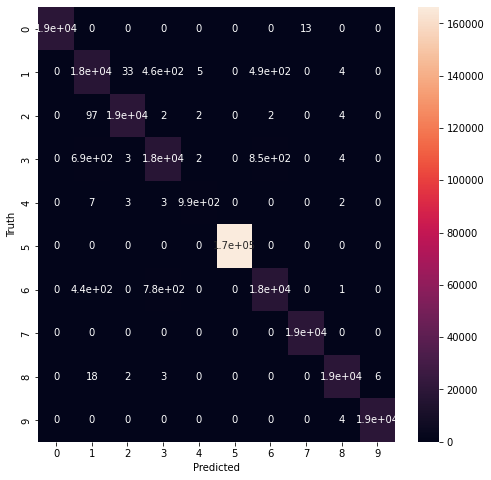

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
#find error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))


In [34]:
error

0.3753921931003549

In [35]:
import time

start = time.time()
y_pred = model.predict(X)
end = time.time()
print("Time Taken: ",end-start)

Time Taken:  26.153990983963013


In [36]:
!pip3 install -U scikit-learn scipy matplotlib


You should consider upgrading via the 'C:\Users\KNA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f"Accuracy: {accuracy_score(y.values, y_pred)}%")

Accuracy: 0.9876893050837915%


In [38]:
import numpy as np

In [39]:
#Input the details of system for APT attack prediction
row = np.array([['192.168.1.30',24,'192.168.1.190',24,'icmp']])
row

array([['192.168.1.30', '24', '192.168.1.190', '24', 'icmp']],
      dtype='<U13')

In [40]:
final = row[:,2]
final

array(['192.168.1.190'], dtype='<U13')

In [41]:
final2 = row[:,1]
final2

array(['24'], dtype='<U13')

In [42]:
row[:,0] = le_srcip.transform(row[:,0])
row[:,2] = le_dstip.transform(row[:,2])
row[:,4] = le_protocol.transform(row[:,4])
row = row.astype(float)
row

array([[4388.,   24., 1466.,   24.,    0.]])

In [43]:
y_pred = model.predict(row)
y_pred

C:\Users\KNA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

# Time Series Forecasting

In [44]:
df.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1.556311e+09,192.168.1.193,49777,192.168.1.195,5357,tcp,http,0.015735,954,2370,...,0.0,0.0,-,-,-,-,-,-,0.0,normal
1,1.556262e+09,192.168.1.190,24239,199.180.180.63,53,udp,dns,0.930596,48,493,...,0.0,0.0,-,-,-,-,-,-,0.0,normal
2,1.556130e+09,192.168.1.30,24,192.168.1.190,24,tcp,-,0.000619,0,0,...,0.0,0.0,-,-,-,-,-,-,2.0,dos
3,1.554303e+09,192.168.1.250,52681,239.255.255.250,1900,udp,-,0.212981,375,0,...,0.0,0.0,-,-,-,-,-,-,0.0,normal
4,1.554309e+09,192.168.1.152,60059,192.168.1.190,53,udp,dns,0.000530,0,298,...,0.0,0.0,-,-,-,-,-,-,0.0,normal


In [45]:
#df2 = df.head(78)
#df2 = df.iloc[:278]

In [46]:
#Feature Selection For Forecasting
df2=df.reset_index()['label']

In [47]:
#Drop null values from the data
df2 = df2.dropna()

In [48]:
df2= df2.head(1258)

In [49]:
df2

0       0.0
1       0.0
2       2.0
3       0.0
4       0.0
       ... 
1253    1.0
1254    0.0
1255    0.0
1256    1.0
1257    1.0
Name: label, Length: 1258, dtype: float64

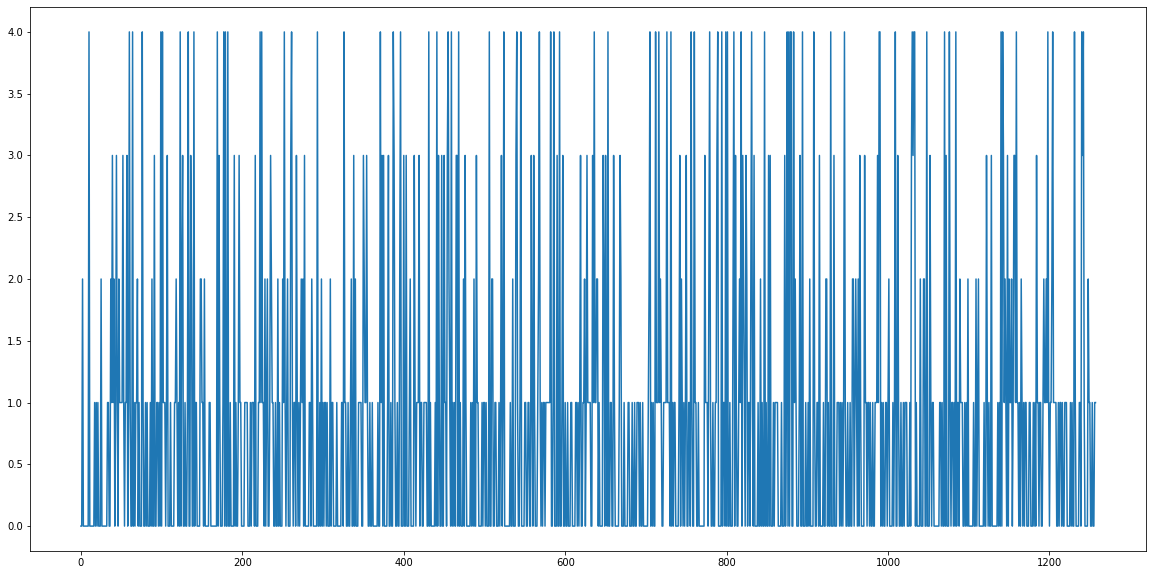

In [50]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df2)

In [51]:
import numpy as np

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [53]:
print(df2)


[[0.  ]
 [0.  ]
 [0.5 ]
 ...
 [0.  ]
 [0.25]
 [0.25]]


In [54]:
#splitting dataset into train and test split
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [55]:
training_size,test_size


(817, 441)

In [56]:
train_data


array([[0.  ],
       [0.  ],
       [0.5 ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.25],
       [0.  ],
       [0.25],
       [0.  ],
       [0.25],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.25],
       [0.25],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.25],
       [0.75],
       [0.25],
       [0.5 ],
       [0.  ],
       [0.25],
       [0.75],
       [0.25],
       [0.  ],
       [0.5 ],
       [0.25],
       [0.25],
       [0.25],
       [0.25],
       [0.75],
       [0.25],
       [0.  ],
       [0.25],
       [0.25],
       [0.75],
       [0.  ],
       [0.25],
       [1.  ],
       [0.25],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.

In [57]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [58]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [59]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [60]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [61]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 44s 1s/step - loss: 0.0987 - val_loss: 0.0813
Epoch 2/100
12/12 [==============================] - 7s 533ms/step - loss: 0.0879 - val_loss: 0.0807
Epoch 3/100
12/12 [==============================] - 5s 441ms/step - loss: 0.0875 - val_loss: 0.0809
Epoch 4/100
12/12 [==============================] - 5s 445ms/step - loss: 0.0882 - val_loss: 0.0804
Epoch 5/100
12/12 [==============================] - 6s 487ms/step - loss: 0.0869 - val_loss: 0.0802
Epoch 6/100
12/12 [==============================] - 6s 524ms/step - loss: 0.0871 - val_loss: 0.0800
Epoch 7/100
12/12 [==============================] - 6s 512ms/step - loss: 0.0874 - val_loss: 0.0799
Epoch 8/100
12/12 [==============================] - 6s 492ms/step - loss: 0.0867 - val_loss: 0.0799
Epoch 9/100
12/12 [==============================] - 5s 443ms/step - loss: 0.0868 - val_loss: 0.0798
Epoch 10/100
12/12 [==============================] - 6s 489ms/step - loss: 0.0869 - val_loss

12/12 [==============================] - 6s 533ms/step - loss: 0.0858 - val_loss: 0.0832
Epoch 82/100
12/12 [==============================] - 6s 542ms/step - loss: 0.0856 - val_loss: 0.0824
Epoch 83/100
12/12 [==============================] - 7s 560ms/step - loss: 0.0855 - val_loss: 0.0837
Epoch 84/100
12/12 [==============================] - 7s 556ms/step - loss: 0.0856 - val_loss: 0.0863
Epoch 85/100
12/12 [==============================] - 7s 562ms/step - loss: 0.0856 - val_loss: 0.0906
Epoch 86/100
12/12 [==============================] - 6s 537ms/step - loss: 0.0860 - val_loss: 0.0821
Epoch 87/100
12/12 [==============================] - 6s 508ms/step - loss: 0.0855 - val_loss: 0.0860
Epoch 88/100
12/12 [==============================] - 7s 572ms/step - loss: 0.0856 - val_loss: 0.0801
Epoch 89/100
12/12 [==============================] - 7s 561ms/step - loss: 0.0857 - val_loss: 0.0817
Epoch 90/100
12/12 [==============================] - 7s 572ms/step - loss: 0.0859 - val_loss: 

In [65]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [66]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 2s 190ms/step


In [67]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


11/11 [==============================] - 2s 191ms/step


In [68]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [69]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.6766462576114082

In [70]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.8100716712192808

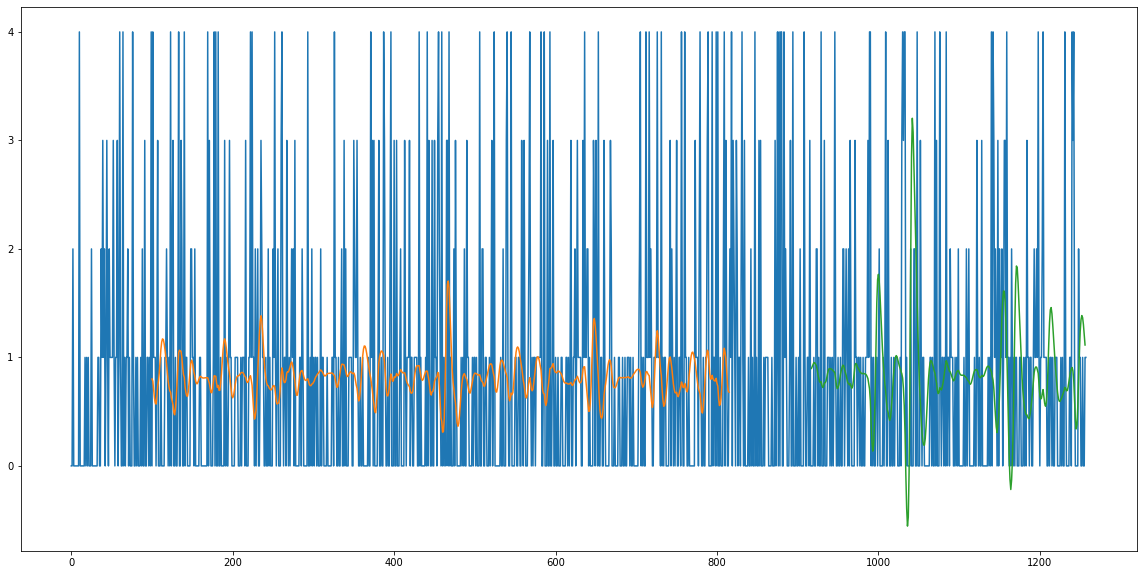

In [71]:
# Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [72]:
len(test_data)



441

In [73]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [74]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.25,
 1.0,
 0.25,
 0.25,
 0.0,
 0.25,
 0.0,
 0.5,
 0.25,
 0.0,
 0.25,
 0.0,
 0.25,
 0.25,
 0.0,
 0.0,
 0.0,
 0.25,
 0.25,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.25,
 0.0,
 0.75,
 0.25,
 0.25,
 0.0,
 0.25,
 0.25,
 0.0,
 0.0,
 0.25,
 0.5,
 0.25,
 0.25,
 0.5,
 0.25,
 1.0,
 0.25,
 0.0,
 0.25,
 0.25,
 0.5,
 1.0,
 0.25,
 0.25,
 0.25,
 0.25,
 0.0,
 0.0,
 0.25,
 0.0,
 0.25,
 0.25,
 0.0,
 0.25,
 0.0,
 0.0,
 0.25,
 0.25,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.25,
 0.0,
 0.0,
 1.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.25,
 0.0,
 1.0,
 0.75,
 1.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.25,
 0.25,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.25,
 0.25]

In [75]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.23067468]
101
1 day input [1.         0.25       0.25       0.         0.25       0.
 0.5        0.25       0.         0.25       0.         0.25
 0.25       0.         0.         0.         0.25       0.25
 0.         0.         0.         0.25       0.         0.25
 0.         0.75       0.25       0.25       0.         0.25
 0.25       0.         0.         0.25       0.5        0.25
 0.25       0.5        0.25       1.         0.25       0.
 0.25       0.25       0.5        1.         0.25       0.25
 0.25       0.25       0.         0.         0.25       0.
 0.25       0.25       0.         0.25       0.         0.
 0.25       0.25       0.25       0.         0.         0.
 0.         0.25       0.         0.25       0.         0.
 1.         0.25       0.         0.         0.         0.
 0.25       0.25       0.         1.         0.75       1.
 0.25       0.         0.         0.         0.         0.5
 0.25       0.25       0.         0.         0.25       0.
 0.         0.

8 day output [[0.16261858]]
9 day input [0.         0.25       0.         0.25       0.25       0.
 0.         0.         0.25       0.25       0.         0.
 0.         0.25       0.         0.25       0.         0.75
 0.25       0.25       0.         0.25       0.25       0.
 0.         0.25       0.5        0.25       0.25       0.5
 0.25       1.         0.25       0.         0.25       0.25
 0.5        1.         0.25       0.25       0.25       0.25
 0.         0.         0.25       0.         0.25       0.25
 0.         0.25       0.         0.         0.25       0.25
 0.25       0.         0.         0.         0.         0.25
 0.         0.25       0.         0.         1.         0.25
 0.         0.         0.         0.         0.25       0.25
 0.         1.         0.75       1.         0.25       0.
 0.         0.         0.         0.5        0.25       0.25
 0.         0.         0.25       0.         0.         0.25
 0.25       0.23067468 0.20880762 0.18994954 0.1749658

16 day output [[0.20884418]]
17 day input [0.25       0.25       0.         0.         0.         0.25
 0.         0.25       0.         0.75       0.25       0.25
 0.         0.25       0.25       0.         0.         0.25
 0.5        0.25       0.25       0.5        0.25       1.
 0.25       0.         0.25       0.25       0.5        1.
 0.25       0.25       0.25       0.25       0.         0.
 0.25       0.         0.25       0.25       0.         0.25
 0.         0.         0.25       0.25       0.25       0.
 0.         0.         0.         0.25       0.         0.25
 0.         0.         1.         0.25       0.         0.
 0.         0.         0.25       0.25       0.         1.
 0.75       1.         0.25       0.         0.         0.
 0.         0.5        0.25       0.25       0.         0.
 0.25       0.         0.         0.25       0.25       0.23067468
 0.20880762 0.18994954 0.17496589 0.16435778 0.15823087 0.15632194
 0.158052   0.16261858 0.16909486 0.17655513 0.

24 day output [[0.20897737]]
25 day input [0.         0.75       0.25       0.25       0.         0.25
 0.25       0.         0.         0.25       0.5        0.25
 0.25       0.5        0.25       1.         0.25       0.
 0.25       0.25       0.5        1.         0.25       0.25
 0.25       0.25       0.         0.         0.25       0.
 0.25       0.25       0.         0.25       0.         0.
 0.25       0.25       0.25       0.         0.         0.
 0.         0.25       0.         0.25       0.         0.
 1.         0.25       0.         0.         0.         0.
 0.25       0.25       0.         1.         0.75       1.
 0.25       0.         0.         0.         0.         0.5
 0.25       0.25       0.         0.         0.25       0.
 0.         0.25       0.25       0.23067468 0.20880762 0.18994954
 0.17496589 0.16435778 0.15823087 0.15632194 0.158052   0.16261858
 0.16909486 0.17655513 0.18417847 0.19130722 0.19749925 0.20250842
 0.20626664 0.20884418 0.21039841 0.211135

In [76]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [77]:
import matplotlib.pyplot as plt


In [78]:
len(df1)

319722

# Network Graph Analysis

In [109]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
import matplotlib as mpl
import numpy as np

In [110]:
df.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1.556311e+09,192.168.1.193,49777,192.168.1.195,5357,tcp,http,0.015735,954,2370,...,0.0,0.0,-,-,-,-,-,-,0.0,normal
1,1.556262e+09,192.168.1.190,24239,199.180.180.63,53,udp,dns,0.930596,48,493,...,0.0,0.0,-,-,-,-,-,-,0.0,normal
2,1.556130e+09,192.168.1.30,24,192.168.1.190,24,tcp,-,0.000619,0,0,...,0.0,0.0,-,-,-,-,-,-,2.0,dos
3,1.554303e+09,192.168.1.250,52681,239.255.255.250,1900,udp,-,0.212981,375,0,...,0.0,0.0,-,-,-,-,-,-,0.0,normal
4,1.554309e+09,192.168.1.152,60059,192.168.1.190,53,udp,dns,0.000530,0,298,...,0.0,0.0,-,-,-,-,-,-,0.0,normal


In [111]:
#Feature selection for Network Analysis
df4 = df.melt(
    ['src_ip','dst_ip','proto','type'],
    var_name = 'Time',value_name='Attack_type')

In [112]:
df4= df4.head(1999)

In [113]:
df4.head()

,src_ip,dst_ip,proto,type,Time,Attack_type
0,192.168.1.193,192.168.1.195,tcp,normal,ts,1556311213.0
1,192.168.1.190,199.180.180.63,udp,normal,ts,1556262143.0
2,192.168.1.30,192.168.1.190,tcp,dos,ts,1556129730.0
3,192.168.1.250,239.255.255.250,udp,normal,ts,1554302541.0
4,192.168.1.152,192.168.1.190,udp,normal,ts,1554308826.0


In [114]:
G = nx.from_pandas_edgelist(df4, 
                            source='src_ip',
                            target='dst_ip',
                            edge_attr='type',
                            create_using=nx.DiGraph())

In [115]:
print(nx.info(G))

DiGraph with 359 nodes and 411 edges


C:\Users\KNA\AppData\Local\Temp\ipykernel_3580\2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


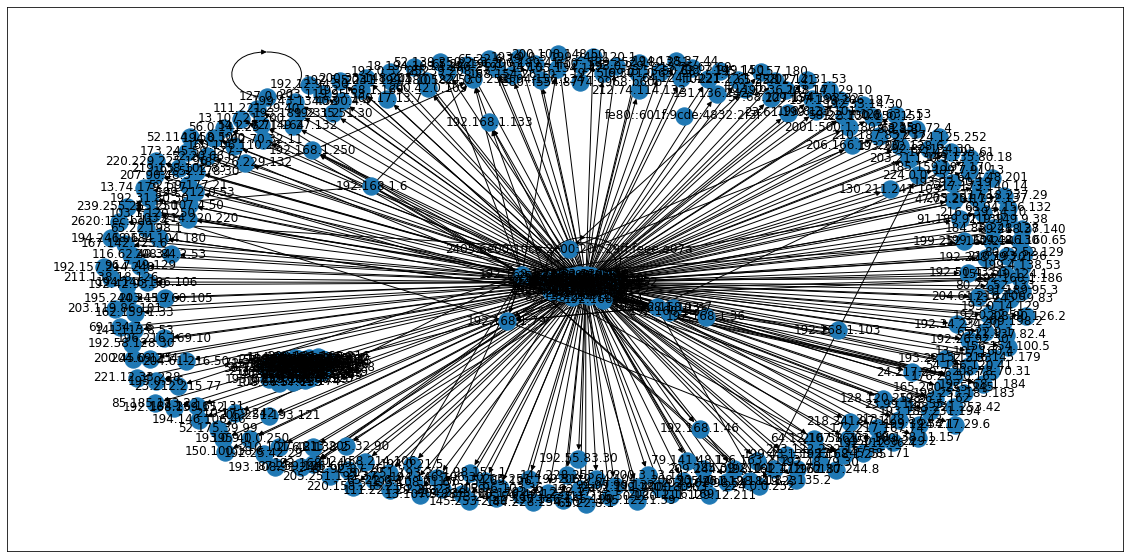

In [116]:
#Graph showing which source ip can target the destination ip 
nx.draw_networkx(G)

In [105]:
G.out_degree(weight='dst_ip')

OutDegreeView({'192.168.1.193': 11, '192.168.1.195': 23, '192.168.1.190': 191, '199.180.180.63': 0, '192.168.1.30': 20, '192.168.1.250': 2, '239.255.255.250': 0, '192.168.1.152': 2, '175.33.176.80': 1, '192.168.1.1': 2, '193.0.9.9': 0, '192.168.1.79': 4, '168.154.26.10': 0, '192.168.1.194': 1, '192.42.93.30': 0, '202.12.31.53': 0, '192.168.1.6': 3, '144.228.255.10': 0, '224.0.0.252': 0, '192.168.1.37': 1, '203.119.44.105': 0, '192.168.1.31': 14, '213.75.63.69': 0, '127.0.0.1': 1, '192.168.1.255': 0, '98.138.11.157': 0, '192.5.6.30': 0, '192.168.1.33': 1, '52.59.177.21': 0, '192.168.1.32': 15, '224.0.0.251': 0, '192.168.1.133': 1, '192.168.1.184': 0, '192.168.1.180': 22, '204.61.216.50': 0, '192.168.1.49': 0, '192.168.1.186': 0, '208.93.4.0': 0, '192.168.1.169': 0, '205.251.193.121': 0, '2405:6e00:10ce:2c00:20c:29ff:feee:e07a': 4, '2001:500:1::803f:235': 0, '192.228.79.201': 0, '192.168.1.36': 4, '192.41.162.30': 0, '24.217.29.7': 0, '192.33.14.30': 0, '199.139.48.130': 0, '203.119.95.5

However in degree is the one that determines the victory

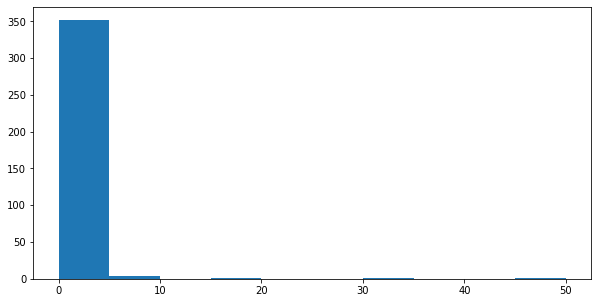

In [106]:
h = plt.hist(dict(G.in_degree(weight='src_ip')).values())

# Ensembling for final prediction

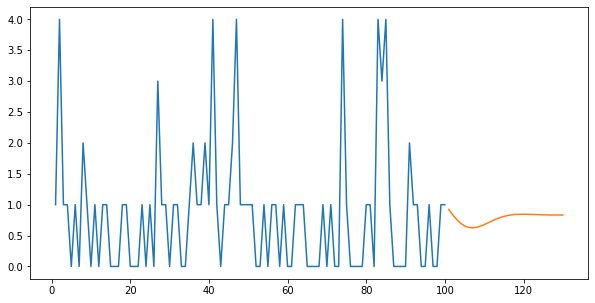

In [107]:
#Forecasting of the next 10 days
plt.plot(day_new,scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

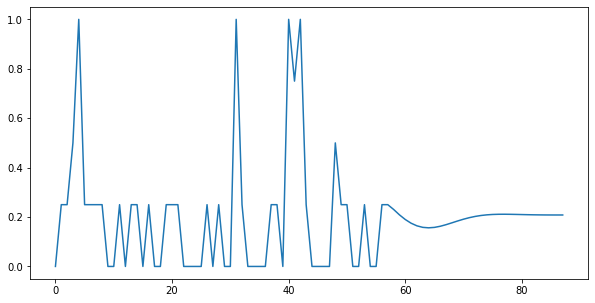

In [108]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

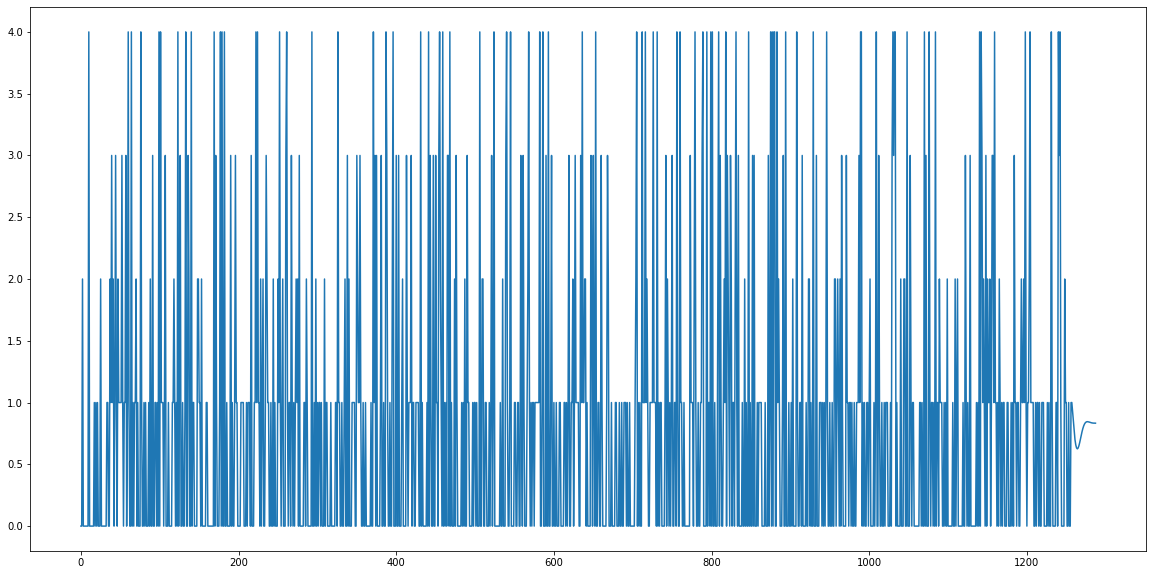

In [91]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [92]:
if(y_pred == 5):
    print("You are safe...No attack predict")
elif(y_pred == 2):
    print("Warning!! It's a Dos attack on IP", final[0], "from port", final2[0], "within 10 days.")
elif(y_pred == 1):
    print("Warning!! It's a Ddos attack on IP", final[0], "from port", final2[0], "within 10 days.")
elif(y_pred == 0):
    print("Warning!! It's a Backdoor attack on IP", final[0],"from port", final2[0], "within 10 days.")
elif(y_pred == 7):
    print("Warning!! It's a Ransomware attack on IP", final[0], "from port", final2[0], "within 10 days.")
elif(y_pred == 8):
    print("Warning!! It's a Scanning attack on IP", final[0], "from port", final2[0], "within 10 days.")
elif(y_pred == 6):
    print("Warning!! It's a Password attack on IP", final[0], "from port", final2[0], "within 10 days.")
elif(y_pred == 3):
    print("Warning!! It's a Injection attack on IP", final[0], "from port", final2[0], "within 10 days.")
elif(y_pred == 9):
    print("Warning!! It's a Xss attack on IP", final[0], "from port", final2[0], "within 10 days.")
else:
    print("Warning!! It's a Mitm attack on IP", final[0], "from port", final2[0], "within 10 days.")
    


Warning!! It's a Dos attack on IP 1466 from port 24 within 10 days.


In [93]:
print("Accuracy of a model by finding error which is", error)

Accuracy of a model by finding error which is 0.3753921931003549


In [94]:
# Generate confusion matrix
matrix = plot_confusion_matrix(model, X, y.values,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()


NameError: name 'plot_confusion_matrix' is not defined